In [2]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
with open("log_analyzer.log", "r") as file:
    logs = file.readlines()

In [4]:
# DATE TIME - APP - LEVEL - MESSAGE
pattern = r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d+) - (\w+) - (\w+) - (.*)"

In [6]:
# PARSE LOGS INTO STRUCTURED DATA
log_data = []

for line in logs:
    match = re.match(pattern, line)
    if match:
        log_data.append({
            "Timestamp": match.group(1),
            "Application": match.group(2),
            "Level": match.group(3),
            "Message": match.group(4)
        })

In [7]:
log_data

[{'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'ERROR',
  'Message': 'Log file not found: /var/log/auth.log'},
 {'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'ERROR',
  'Message': 'Log file not found: /var/log/syslog'},
 {'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'ERROR',
  'Message': 'Log file not found: /var/log/application.log'},
 {'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'INFO',
  'Message': 'Starting log analysis cycle'},
 {'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'WARNING',
  'Message': 'Log file does not exist: /var/log/auth.log'},
 {'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'WARNING',
  'Message': 'Log file does not exist: /var/log/syslog'},
 {'Timestamp': '2025-03-30 10:28:34,339',
  'Application': 'LogAnalyzer',
  'Level': 'WARNING',
  'M

In [9]:
# CREATE DATAFRAME
df = pd.DataFrame(log_data)
df["Timestamp"] = pd.to_datetime(
    df["Timestamp"],
    format="%Y-%m-%d %H:%M:%S,%f"
)
df.head()

,Timestamp,Application,Level,Message
0,2025-03-30 10:28:34.339,LogAnalyzer,ERROR,Log file not found: /var/log/auth.log
1,2025-03-30 10:28:34.339,LogAnalyzer,ERROR,Log file not found: /var/log/syslog
2,2025-03-30 10:28:34.339,LogAnalyzer,ERROR,Log file not found: /var/log/application.log
3,2025-03-30 10:28:34.339,LogAnalyzer,INFO,Starting log analysis cycle
4,2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/auth.log


In [10]:
# BASIC LOG ANALYSIS
#Count log levels
df["Level"].value_counts()

Level
ERROR      6
WARNING    6
INFO       5
Name: count, dtype: int64

In [11]:
# ERROR FREQUENCY ANALYSIS - To identify most common failures.
error_logs = df[df["Level"] == "ERROR"]
error_logs["Message"].value_counts()

Message
Log file not found: /var/log/auth.log           2
Log file not found: /var/log/syslog             2
Log file not found: /var/log/application.log    2
Name: count, dtype: int64

In [12]:
# TIME-BASED ERROR TREND -to detect error spikes.
df.set_index("Timestamp", inplace=True)
df.resample("1Min").count()["Level"]

Timestamp
2025-03-30 10:28:00    9
2025-03-30 10:29:00    8
Freq: min, Name: Level, dtype: int64

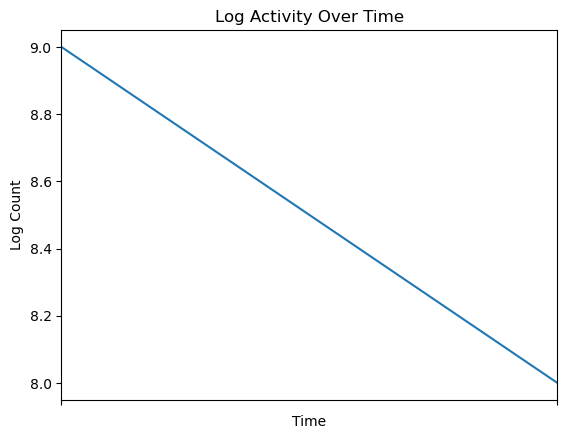

In [13]:
df.resample("1Min").count()["Level"].plot()
plt.title("Log Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Log Count")
plt.show()

In [16]:
# Filter only WARNING logs
df[df["Level"] == "WARNING"]

,Application,Level,Message
Timestamp,,,
2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/auth.log
2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/syslog
2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/application.log
2025-03-30 10:29:33.448,LogAnalyzer,WARNING,Log file does not exist: /var/log/auth.log
2025-03-30 10:29:33.448,LogAnalyzer,WARNING,Log file does not exist: /var/log/syslog
2025-03-30 10:29:33.448,LogAnalyzer,WARNING,Log file does not exist: /var/log/application.log


In [15]:
df.loc["2025-03-30"]


,Application,Level,Message
Timestamp,,,
2025-03-30 10:28:34.339,LogAnalyzer,ERROR,Log file not found: /var/log/auth.log
2025-03-30 10:28:34.339,LogAnalyzer,ERROR,Log file not found: /var/log/syslog
2025-03-30 10:28:34.339,LogAnalyzer,ERROR,Log file not found: /var/log/application.log
2025-03-30 10:28:34.339,LogAnalyzer,INFO,Starting log analysis cycle
2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/auth.log
2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/syslog
2025-03-30 10:28:34.339,LogAnalyzer,WARNING,Log file does not exist: /var/log/application.log
2025-03-30 10:28:34.339,LogAnalyzer,INFO,Completed log analysis cycle
2025-03-30 10:28:58.672,LogAnalyzer,INFO,Log analyzer stopped by user


In [16]:
summary = {
    "Total Logs": len(df),
    "Errors": len(df[df["Level"] == "ERROR"]),
    "Warnings": len(df[df["Level"] == "WARNING"]),
    "Info": len(df[df["Level"] == "INFO"])
}

summary

{'Total Logs': 17, 'Errors': 6, 'Warnings': 6, 'Info': 5}